# COGS 108 - Final Project 

# Overview

We are analyzing data on unemployment rates to summarize the state of the economy, median incomes for a variety of majors, and numbers of students in given majors. We will be comparing these data sets to determine if unemployment rates influence major selection, and compare the median earnings to popular and unpopular majors to attempt to find trends. Using our findings, we found that….  !

# Names

- Carolyn Sanford
- Tuong Tang
- Danielle Zusman
- Thomas Dailey
- Jiaao Mo

# Group Members IDs

- A14737810
- A14702369
- A13847129
- A15716898
- A15724489

# Research Question

● Which majors are becoming most popular - country wide? 

● What does major popularity say about the state of the economy?

# Background and Prior Work

The datasets that consists of this project will be the types of varying majors that are offered in various schools in the United States from across a period of 1900s to present day along with majors in STEM which are shown in categories of race, sex and the level of the degree upon graduation. Alongside these datasets there are the number of employed and unemployed graduates and their major and the market for recent graduates based on major. Based on the datasets we found that STEM majors are becoming more of a focus on the majors by graduation and this growth has been shown in the recent years.

In comparison to projects that have already looked at similar datasets we noticed that the Hamilton Project released their findings as they looked at annual earnings over a career by degree and major as they took a dataset with a sample of 80 majors and compared their lifetime earnings. Alongside this they also took a distribution and earnings difference to associate which majors are culminating into higher margins based on percentile for the number of graduates in those majors and comparing these percentiles with different majors. They discovered that even the graduates in the highest earning majors will be out earned by some graduates in majors which on average would be more likely to earn less overall.

Overall our project consists of these datasets and we ask the questions of how majors are affected by gender and ethnicity alongside the majors that are becoming more offered and decided by universities across the United States. There are also ethical considerations that link to privacy of data and how we can assure that this data remains private. Lastly we do not pass judgement or measure the worth of a major based on our questions rather we are assessing how this data can help future and current graduates look at majors and find out any questions that might be related to the ones that are being asked and assessed in this project.

References (include links):

- 1) https://www.hamiltonproject.org/papers/major_decisions_what_graduates_earn_over_their_lifetimes https://nces.ed.gov/programs/coe/indicator_cta.asp
- 2)

# Hypothesis

Hypothesis: Students tend to pursue majors in STEM fields when the economy is struggling, and have more diversity of majors in times of economic prosperity.

We chose this topic because we wanted to get a better understanding of why certain fields are more popular than others, and see if there is a correlation with the economic crisis on major selection. It is our assumption that in times of economic uncertainty, people would be more likely to go into what is considered safe fields that will provide a steady income. This is typically thought of as STEM fields. 


# Ethics & Privacy

We are using datasets pulled from the National Center for Education Statistics (NCES). NCES is under the U.S. Department of Education (and a .gov site) all published government data is free for public use. We are relying on NCES/U.S.ED data collection standards to insure privacy. The non-NCES datasets have Creative Commons license allowing us to us it to share and adapt the data. None of the data we are looking at exposes personally identifiable information, so we have no privacy concerns. We are not passing any sort of judgement towards STEM vs Liberal Arts, we are just measuring the impact of economics on the enrollment of the two. At this point, we do not anticipate any issues with ethical concerns but we will remain vigilant to see if some arise. If they do, we will come up with a plan and implement it before presenting out findings.

# Dataset(s)

● Degrees granted from postsecondary schools receiving title IV aid from select years in 1970-2017:
https://nces.ed.gov/programs/digest/d10/tables/dt10_329.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_330.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_328.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_327.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_326.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_325.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_324.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_323.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_322.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_319.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_318.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_317.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_316.asp

● Degrees granted in stem fields broken down by race, sex, and level of degree: https://nces.ed.gov/programs/digest/d18/tables/dt18_318.45.asp

● This dataset offers number of employed & unemployed college grads, categorized by majors https://data.world/fivethirtyeight/college-majors

● Outcomes of Education Labor Market Outcomes for Recent Bachelor's Degree Completers https://data.world/nces/market-for-rec-college-grads


# Setup

In [95]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

For formating, we imported the data into excel for aesthetics, and combined data sets to create relevant and convenient files. For basic cleaning, we checked the data for any zeros and NaN values. It typically meant that data had not yet been collected for that period.

We found the proportional percent per major per year to normalize the raw data on total graduates from programs receiving title IV aid. Normalization is important because we want to reduce the risk of having disproportionate data considering the change in people attending college as it becomes more “popular” throughout the years. Normalizing the data helped clean it and remove potential bias, making it easier to understand the data in context. 

Bachelor's degrees conferred by postsecondary institutions, by field of study: Selected years, 1970-71 through 2016-17

In [2]:
df_MajorsByYear = pd.read_csv('MajorsByYear.csv')
df_MajorsByYear

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2006-07,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,Total,839730.0,925746.0,935140.0,987823.0,1094538.0,1164792.0,1244171.0,1485104.0,1524729.0,1601399.0,1649919.0,1716053.0,1792163.0,1840381.0,1870150.0,1894969.0,1920750.0,1956032.0
1,Agriculture and natural resources,12672.0,19402.0,21886.0,16823.0,13124.0,21425.0,23370.0,23052.0,23144.0,24982.0,26343.0,28630.0,30972.0,33592.0,35125.0,36278.0,36995.0,37719.0
2,Architecture and related services,5570.0,9146.0,9455.0,9119.0,9781.0,8352.0,8480.0,9515.0,9717.0,10119.0,10051.0,9831.0,9727.0,9757.0,9149.0,9090.0,8825.0,8573.0
3,"Area, ethnic, cultural, gender, and group studies",2579.0,3577.0,2887.0,3021.0,4776.0,5633.0,6160.0,7878.0,8196.0,8772.0,8620.0,8955.0,9228.0,8850.0,8275.0,7783.0,7840.0,7720.0
4,Biological and biomedical sciences,35705.0,54154.0,43078.0,38395.0,39482.0,61014.0,60576.0,70602.0,76809.0,82828.0,86391.0,89984.0,95850.0,100397.0,104657.0,109904.0,113794.0,116759.0
5,Business,115396.0,143171.0,200521.0,236700.0,249165.0,226623.0,263515.0,318043.0,327850.0,348056.0,358119.0,365133.0,367235.0,360887.0,358132.0,363741.0,371690.0,381353.0
6,"Communication, journalism, and related programs",10324.0,20045.0,29428.0,41666.0,51650.0,47320.0,58013.0,73658.0,74800.0,77984.0,81280.0,83231.0,83771.0,84818.0,87612.0,90658.0,92551.0,93778.0
7,Communications technologies,478.0,1237.0,1854.0,1479.0,1397.0,853.0,1178.0,2987.0,3642.0,5100.0,4782.0,4858.0,4983.0,4987.0,4991.0,5135.0,4824.0,4615.0
8,Computer and information sciences,2388.0,5652.0,15121.0,42337.0,25159.0,24506.0,44142.0,47702.0,42164.0,37992.0,39593.0,43066.0,47406.0,50961.0,55271.0,59586.0,64402.0,71420.0
9,Education,176307.0,154437.0,108074.0,87147.0,110807.0,105384.0,105458.0,107235.0,105683.0,101716.0,101287.0,104008.0,105656.0,104698.0,98838.0,91596.0,87221.0,85118.0


In [68]:
test_df = pd.DataFrame([[1, 2, ], [3, 4]], columns=['A', 'B'])
tots = pd.DataFrame([[10, 20]], columns=['A', 'B'])

In [69]:
test_df

,A,B
0,1,2
1,3,4


In [70]:
tots

,A,B
0,10,20


In [64]:
for col in test_df.columns:
    print(test_df[col])
    test_df[col] = test_df[col] / tots[col].values[0]

test_df

0    1
1    3
Name: A, dtype: int64
0    2
1    4
Name: B, dtype: int64


,A,B
0,0.1,0.1
1,0.3,0.2


In [56]:
test_df[col] / tots[col]

0    0.1
1    NaN
Name: B, dtype: float64

In [59]:
tots[col].values[0]

20

In [7]:
# convert to percentage

#total = []
#for column in MajorsByYear:
#    total.append(MajorsByYear[column][0])
#total.remove('   Total ')
#total

#for column in MajorsByYear.loc[:, "1970-71":"2016-17"]:
#    print(MajorsByYear[column])
#    MajorsByYear[column].values = (MajorsByYear[column].values / MajorsByYear[column].sum)*100
#    MajorsByYear[column][i] = round(MajorsByYear[column][i], 2)
#MajorsByYear
for column in df_MajorsByYear.loc[:, "1970-71":"2016-17"]:
    for i in range(1,34):
        df_MajorsByYear[column][i] = (df_MajorsByYear[column][i] / df_MajorsByYear[column][0]) * 100
        df_MajorsByYear[column][i] = round(df_MajorsByYear[column][i], 2)
df_MajorsByYear

#MajorsByYear.loc[:, "1970-71":"2016-17"]

#for row in MajorsByYear:
#    temp = MajorsByYear.loc[:, "1970-71":"2016-17"].div(MajorsByYear[row],axis = 0)
#temp

/Users/tuong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/tuong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2006-07,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,Total,839730.00,925746.00,935140.00,987823.00,1094538.00,1164792.00,1244171.00,1485104.00,1524729.00,1601399.00,1649919.00,1716053.00,1792163.00,1840381.00,1870150.00,1894969.00,1920750.00,1956032.00
1,Agriculture and natural resources,1.51,2.10,2.34,1.70,1.20,1.84,1.88,1.55,1.52,1.56,1.60,1.67,1.73,1.83,1.88,1.91,1.93,1.93
2,Architecture and related services,0.66,0.99,1.01,0.92,0.89,0.72,0.68,0.64,0.64,0.63,0.61,0.57,0.54,0.53,0.49,0.48,0.46,0.44
3,"Area, ethnic, cultural, gender, and group studies",0.31,0.39,0.31,0.31,0.44,0.48,0.50,0.53,0.54,0.55,0.52,0.52,0.51,0.48,0.44,0.41,0.41,0.39
4,Biological and biomedical sciences,4.25,5.85,4.61,3.89,3.61,5.24,4.87,4.75,5.04,5.17,5.24,5.24,5.35,5.46,5.60,5.80,5.92,5.97
5,Business,13.74,15.47,21.44,23.96,22.76,19.46,21.18,21.42,21.50,21.73,21.71,21.28,20.49,19.61,19.15,19.20,19.35,19.50
6,"Communication, journalism, and related programs",1.23,2.17,3.15,4.22,4.72,4.06,4.66,4.96,4.91,4.87,4.93,4.85,4.67,4.61,4.68,4.78,4.82,4.79
7,Communications technologies,0.06,0.13,0.20,0.15,0.13,0.07,0.09,0.20,0.24,0.32,0.29,0.28,0.28,0.27,0.27,0.27,0.25,0.24
8,Computer and information sciences,0.28,0.61,1.62,4.29,2.30,2.10,3.55,3.21,2.77,2.37,2.40,2.51,2.65,2.77,2.96,3.14,3.35,3.65
9,Education,21.00,16.68,11.56,8.82,10.12,9.05,8.48,7.22,6.93,6.35,6.14,6.06,5.90,5.69,5.29,4.83,4.54,4.35


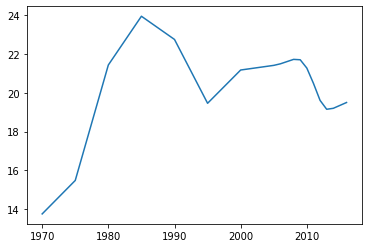

In [187]:
#business
#eng lit
#eng
#psy
#Philosophy and religious studies
#biology

#temp = pd.DataFrame([df_MajorsByYear.iloc[5]])
#temp

array = np.asarray(df_MajorsByYear.iloc[5, 1:])
year = [1970,1975,1980,1985,1990,1995,2000,2005,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016]
plt.plot(year,array)
#df_MajorsByYear.iloc[5, 1:]

Labor Force Statistics from the Current Population Survey					
Original Data Value					
					
Series Id:	LNS14000000				
Seasonally Adjusted					
Series title:	(Seas) Unemployment Rate				
Labor force status:	Unemployment rate				
Type of data:	Percent or rate				
Age:	16 years and over				
Years:	1970 to 2019

In [3]:
# import dataset for unemployment rates
df_UnemploymentRates = pd.read_csv('UnemploymentRates.csv')
df_UnemploymentRates

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1970,3.9,4.2,4.4,4.6,4.8,4.9,5.0,5.1,5.4,5.5,5.9,6.1
1,1971,5.9,5.9,6.0,5.9,5.9,5.9,6.0,6.1,6.0,5.8,6.0,6.0
2,1972,5.8,5.7,5.8,5.7,5.7,5.7,5.6,5.6,5.5,5.6,5.3,5.2
3,1973,4.9,5.0,4.9,5.0,4.9,4.9,4.8,4.8,4.8,4.6,4.8,4.9
4,1974,5.1,5.2,5.1,5.1,5.1,5.4,5.5,5.5,5.9,6.0,6.6,7.2
5,1975,8.1,8.1,8.6,8.8,9.0,8.8,8.6,8.4,8.4,8.4,8.3,8.2
6,1976,7.9,7.7,7.6,7.7,7.4,7.6,7.8,7.8,7.6,7.7,7.8,7.8
7,1977,7.5,7.6,7.4,7.2,7.0,7.2,6.9,7.0,6.8,6.8,6.8,6.4
8,1978,6.4,6.3,6.3,6.1,6.0,5.9,6.2,5.9,6.0,5.8,5.9,6.0
9,1979,5.9,5.9,5.8,5.8,5.6,5.7,5.7,6.0,5.9,6.0,5.9,6.0


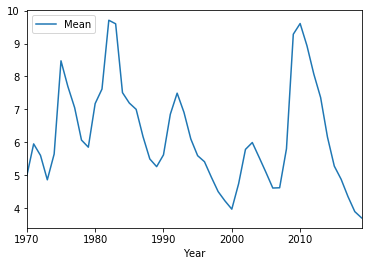

In [4]:
# calculate a mean column
df_UnemploymentRates['Mean']=df_UnemploymentRates.loc[:,'Jan':'Dec'].mean(axis=1)

# make a plot of Mean
df_UnemploymentRates.plot( x='Year', y='Mean')

In [5]:
# inmport dataset for expected income
df_income_expected = pd.read_csv('degrees-that-pay-back.csv')
df_income_expected

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"
5,Art History,"$35,800.00","$64,900.00",81.3,"$28,800.00","$42,200.00","$87,400.00","$125,000.00"
6,Biology,"$38,800.00","$64,800.00",67.0,"$36,900.00","$47,400.00","$94,500.00","$135,000.00"
7,Business Management,"$43,000.00","$72,100.00",67.7,"$38,800.00","$51,500.00","$102,000.00","$147,000.00"
8,Chemical Engineering,"$63,200.00","$107,000.00",69.3,"$71,900.00","$87,300.00","$143,000.00","$194,000.00"
9,Chemistry,"$42,600.00","$79,900.00",87.6,"$45,300.00","$60,700.00","$108,000.00","$148,000.00"


In [6]:
# new dataset. built by combining majors from several files by "total"
df_combinedMajors = pd.read_csv('Cogs108_data.csv')
df_combinedMajors

,Year,Economics,History,Political science and government,Sociology,Visual and Performing arts,Social Sciences,Public Administration,Pyschology,Chemistry,...,Electrical Engineering,Mechanical Engineering,Engineering,Biomedical,Biology,Microbiology,Zoology,Business,Communication,Computer Science
0,1970-71,"15,758","44,663","27,482","33,263","30,394","155,324","5,466","38,187","11,061",...,"12,198","8,858","50,182","35,683","26,294","1,475","5,721","115,396","10,802","2,388"
1,1971-72,"15,231","43,695","28,135","35,216","33,831","158,060","7,508","43,433","10,588",...,"12,101","8,530","51,258","37,269","27,473","1,548","5,518","121,917","12,340","3,402"
2,1972-73,"14,770","40,943","30,100","35,436","36,017","155,970","10,690","47,940","10,124",...,"12,313","8,523","51,384","42,205","31,185","1,940","5,763","126,717","14,317","4,304"
3,1973-74,"14,285","37,049","30,744","35,491","39,730","150,320","11,966","52,139","10,430",...,"11,316","7,677","50,412","48,224","36,188","2,311","6,128","132,304","17,096","4,756"
4,1974-75,"14,046","31,470","29,126","31,488","40,782","135,190","13,661","51,245","10,541",...,"10,161","6,890","47,131","51,576","38,748","2,767","6,110","133,639","19,248","5,033"
5,1975-76,"14,741","28,400","28,302","27,634","42,138","126,396","15,440","50,278","11,015",...,"9,791","6,800","46,676","54,085","40,163","2,927","6,077","143,171","21,282","5,652"
6,1976-77,"15,296","25,433","26,411","24,713","41,793","117,040","16,136","47,861","11,200",...,"9,936","7,703","49,482","53,420","39,530","2,884","5,574","152,010","23,214","6,407"
7,1977-78,"15,661","23,004","26,069","22,750","40,951","112,952","16,607","44,879","11,304",...,"11,133","8,875","56,150","51,326","37,598","2,695","5,096","160,775","25,400","7,201"
8,1978-79,"16,409","21,019","25,628","20,285","40,969","108,059","17,328","42,697","11,499",...,"12,338","10,107","62,898","48,668","35,962","2,670","4,738","172,392","26,457","8,719"
9,1979-80,"17,863","19,301","25,457","18,881","40,892","103,662","16,644","42,093","11,229",...,"13,821","11,808","69,387","46,190","33,523","2,631","4,301","186,264","28,616","11,154"
